<a href="https://colab.research.google.com/github/EdenGebremedhin/diabetic_risk_pridiction/blob/main/Diabetic_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diabetes Risk Using Machine Learning

## 1. Introduction

Diabetes is a chronic medical condition that affects the body’s ability to regulate blood sugar levels. Early detection of diabetes risk is essential for preventing severe health complications and enabling timely medical intervention.

In this project, machine learning techniques are applied to predict the risk of diabetes using patient health data. The objective is to build and compare multiple classification models and identify the most effective approach for diabetes risk prediction.


## 2. Dataset Description

The dataset used in this project is the PIMA Indians Diabetes Database, which is publicly available on Kaggle. It contains medical diagnostic measurements for female patients of Pima Indian heritage.

The dataset consists of 768 instances and includes several health-related features such as glucose level, body mass index (BMI), blood pressure, age, and family history of diabetes. The target variable indicates whether a patient has diabetes (1) or not (0).


1. Data Preprocessing:
      - Handle missing values
      - Encode categorical variables - no categorical variables in our case
      - Normalize/scale features


In [35]:
import pandas as pd
import numpy as np
import kagglehub
import os


# 1. Load Dataset
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
csv_file = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break

data = pd.read_csv(csv_file)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


**Feature selection:** selecting only the 5 required features + target

In [36]:
selected_features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'DiabetesPedigreeFunction']
data = data[selected_features + ['Outcome']]


In [37]:
data.head()
# data.columns

,Glucose,BloodPressure,BMI,Age,DiabetesPedigreeFunction,Outcome
0,148,72,33.6,50,0.627,1
1,85,66,26.6,31,0.351,0
2,183,64,23.3,32,0.672,1
3,89,66,28.1,21,0.167,0
4,137,40,43.1,33,2.288,1


**Handling missing values:** invalid zeros (missing values disguised as 0)

 - 0(fake values) --> NaN(real missing value), Makes them ready for imputation

In [38]:
cols_with_zero = ['Glucose', 'BloodPressure', 'BMI']
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

Checking how many values are converted to NaN:

In [39]:
data[cols_with_zero].isna().sum()


,0
Glucose,5
BloodPressure,35
BMI,11


**Imputation** - fill in missing values using statistical or model-based methods (median)

In [40]:
data[cols_with_zero] = data[cols_with_zero].fillna(data[cols_with_zero].median())

In [41]:
# Confirming no missing values remain
data[cols_with_zero].isna().sum()

# # Check summary stats after imputation
# data[cols_with_zero].describe()


,0
Glucose,0
BloodPressure,0
BMI,0


In [42]:
# Defining Features and target variables
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [43]:
X.head()
y.head()

X.shape, y.shape


((768, 5), (768,))

**Encode categorical variables** - The dataset does not contain any categorical variables. Therefore, encoding of categorical features was not required for this project.


**Scale features** - to put all features on a similar range, ensuring that models treat them fairly.

In [44]:

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is performed to understand the underlying structure of the dataset and to identify patterns and relationships among the features. Through visual analysis, EDA helps in detecting trends, potential outliers, and the relevance of each feature in predicting diabetes risk.

In this project,
- Distribution plots are used to analyze the spread and characteristics of individual features.
- Correlation heatmaps are employed to examine relationships between variables and their association with the target outcome.


# Class Distribution

In [45]:
# # Class distribution
# sns.countplot(x=y)
# plt.title("Diabetes Outcome Distribution")
# plt.show()

class distribution of the diabetes target variable:

- Outcome = 0 (No diabetes) → ~500 samples (65%)

- Outcome = 1 (Diabetes) → ~270 samples (35%)

### Data Distribution Visualization

Distribution plots are used to examine how individual features such as glucose level, BMI, age, and blood pressure are distributed across the dataset. These visualizations help identify skewness, outliers, and differences in feature values between diabetic and non-diabetic patients.
(e.g., normal, skewed, uniform).

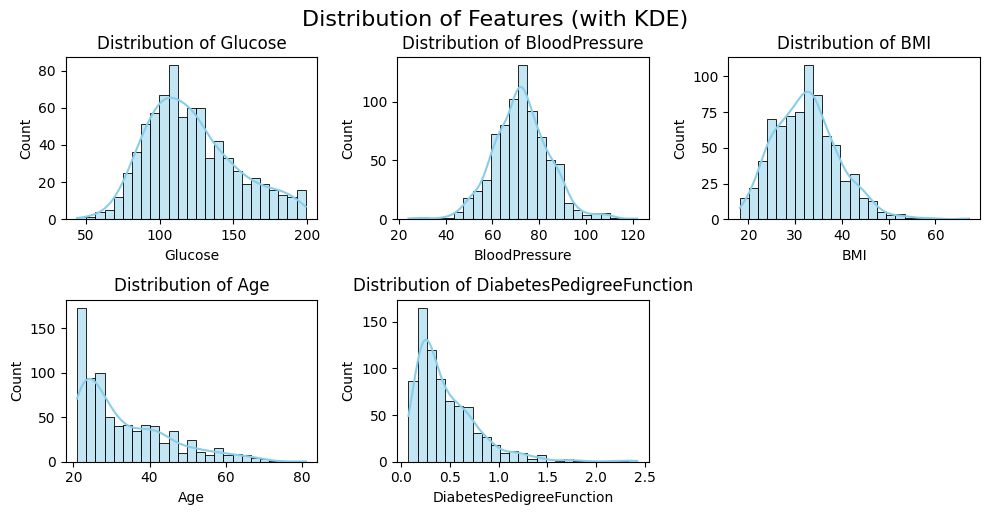

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Data Distribution

features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'DiabetesPedigreeFunction']

plt.figure(figsize=(10, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=X, x=feature, kde=True, color='skyblue', bins=25)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle('Distribution of Features (with KDE)', fontsize=16, y=1.02)
plt.show()

- **Blood Pressure & BMI:** These exhibit a Normal Distribution (bell curve), with most individuals clustered around the center (e.g., Blood Pressure peaks near 70-80 mmHg).

- **Age & DiabetesPedigreeFunction:** These are Right-Skewed, meaning the majority of the population is younger or has a lower pedigree score, with a "long tail" of older individuals or those with high pedigree values.

- **Glucose:** Shows a fairly wide spread, with a primary peak around 100-120 and a secondary smaller bump at higher levels (near 200), which likely represents the diabetic portion of the group.

In [47]:
import pandas as pd

# Calculate the correlation matrix from the processed data
corr = data.corr()

# Display the correlations with the target variable 'Outcome'
correlations = corr['Outcome'].sort_values(ascending=False)
display(correlations)

,Outcome
Outcome,1.000000
Glucose,0.492782
BMI,0.312038
Age,0.238356
DiabetesPedigreeFunction,0.173844
BloodPressure,0.165723


It is observed that diabetic patients generally have higher glucose and BMI values compared to non-diabetic patients.


### Correlation Analysis

A correlation heatmap is used to visualize the strength and direction of relationships between numerical features and the target variable. This analysis helps identify the most influential features for diabetes prediction and detects multicollinearity among input variables.


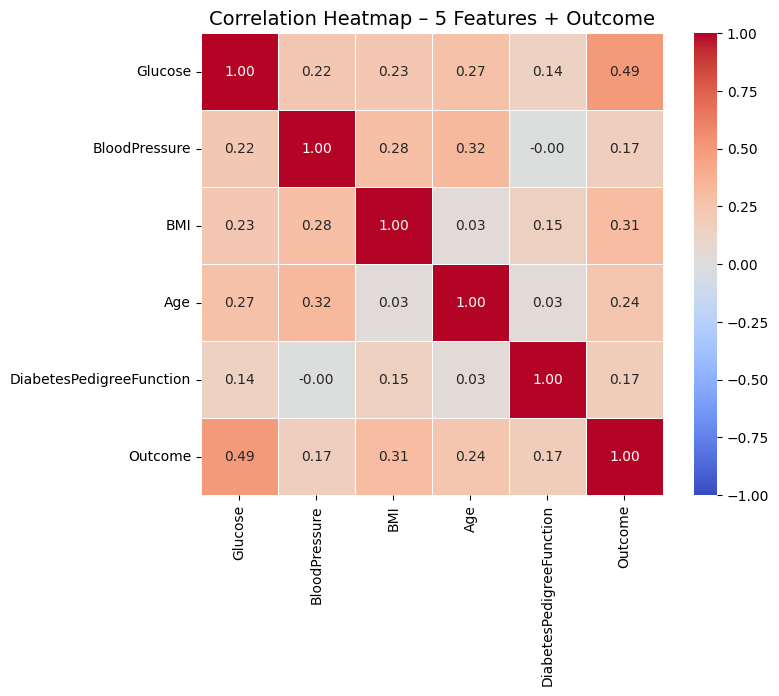

In [48]:
# Correlation matrix
corr = data.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5,
            vmin=-1, vmax=1, center=0, square=True)
plt.title('Correlation Heatmap – 5 Features + Outcome', fontsize=14)
plt.show()


### Correlation with Diabetes Outcome

This bar plot visualizes the Pearson correlation between each input feature and the target variable (Outcome). The purpose of this analysis is to identify which health indicators are most strongly associated with diabetes and therefore most relevant for prediction.


- Ranks the predictive strength of the each feature:

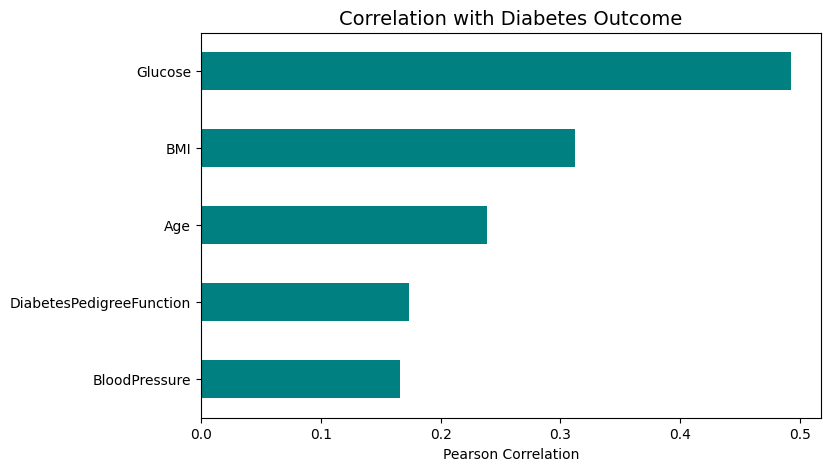

In [49]:
#Correlations with Outcome (bar plot)
plt.figure(figsize=(8, 5))
corr['Outcome'].drop('Outcome').sort_values().plot(kind='barh', color='teal')
plt.title('Correlation with Diabetes Outcome', fontsize=14)
plt.xlabel('Pearson Correlation')
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

From the plot, glucose level shows the strongest positive correlation with diabetes outcome, indicating that higher glucose values are strongly associated with increased diabetes risk. Other features such as BMI and age also demonstrate positive correlations, while some features exhibit weaker relationships with the target variable.

This analysis helps prioritize important features and supports informed model selection and interpretation.


**Model Training**

Multiple machine learning models are trained to predict diabetes risk, including Logistic Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), and Neural Networks. Each model is trained using the same training data to ensure a fair comparison.


Model Training & Evaluation:
- Train models using train/test split
- Evaluate using metrics like Accuracy, Precision, Recall, F1-score, and RMSE

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,          # 75% train, 25% test
    random_state=42,         # Ensures reproducibility
    stratify=y               # stratified because of class imbalance
)

# Feature scaling (essential for Logistic Regression, SVM, Neural Network)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)    # fit only on training data
X_test_scaled  = scaler.transform(X_test)         # use same scaler

Definining Models

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(
        hidden_layer_sizes=(64, 32),    # simple but reasonable architecture
        max_iter=1500,      #max training epochs(NN often needs many iterations to converge)
        random_state=42,
        early_stopping=True    #Automatically stops training when validation score stops improving - Prevents overfitting and saves time
    )
}

Train, predict & evaluate models

In [52]:
results = []
for name, model in models.items():

    # Decide whether to use scaled or unscaled data
    if name in ["Logistic Regression", "SVM", "Neural Network"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate classification metrics
    acc    = accuracy_score(y_test, y_pred)
    prec   = precision_score(y_test, y_pred, zero_division=0)
    rec    = recall_score(y_test, y_pred, zero_division=0)
    f1     = f1_score(y_test, y_pred, zero_division=0)


    rmse   = np.sqrt(mean_squared_error(y_test, y_pred))      # RMSE - uncommon for classification, but computes error magnitude like regression

    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-score": round(f1, 3),
        "RMSE": round(rmse, 3)
    })


## Model Comparison

The performance of all trained machine learning models is compared to determine the most effective approach for diabetes risk prediction. Each model is evaluated using the same training and testing data to ensure a fair comparison.

Evaluation metrics such as accuracy, precision, recall, F1-score, and RMSE are used to assess model performance. Special emphasis is placed on recall and F1-score, as correctly identifying diabetic patients is critical in a healthcare context.

The comparison highlights the strengths and limitations of each model and provides a basis for selecting the best-performing model for final deployment.


4. Model Comparison:
- Compare the performance of different models
- Choose the best-performing model


In [53]:
# Comparison table
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")
print(results_df.sort_values("F1-score", ascending=False).to_string(index=False))



Model Performance Comparison:

              Model  Accuracy  Precision  Recall  F1-score  RMSE
      Random Forest     0.771      0.695   0.612     0.651 0.479
      Decision Tree     0.760      0.691   0.567     0.623 0.489
Logistic Regression     0.734      0.648   0.522     0.579 0.515
                SVM     0.734      0.660   0.493     0.564 0.515
     Neural Network     0.729      0.647   0.493     0.559 0.520


Visualize metrics across models:

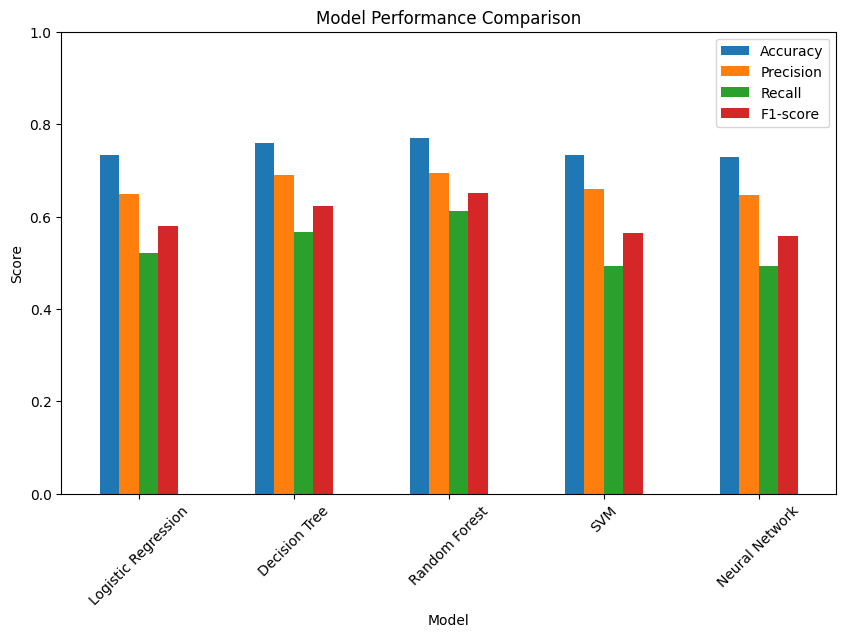

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Define results_df before plotting
results_df = pd.DataFrame(results)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
results_df.set_index('Model')[metrics].plot(kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

- Select best performed model(Random forest) using F1-Score
- Save both model and its scaler for future inference

In [55]:
# @title
# import joblib

# # Identify the best performing model from the results
# best_model_name = results_df.sort_values("F1-score", ascending=False).iloc[0]['Model']
# best_model = models[best_model_name]

# joblib.dump(best_model, 'Random_Forest_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')

In [56]:
# @title
# print("X_test shape:", X_test.shape)
# print("\nFirst 10 rows of X_test:")
# print(X_test.head(10))

# print("\nCorresponding y_test (true labels):")
# print(y_test.head(10))

In [57]:
# @title
# # Pick one row from test set
# sample = X_test.iloc[0:1]      # shape (1,5)
# # sample_scaled = scaler.transform(sample)


# if best_model_name in ["Logistic Regression", "SVM", "Neural Network"]:
#     sample_input = scaler.transform(sample)
# else:
#     sample_input = sample

# raw_pred = best_model.predict(sample_input)
# raw_prob = best_model.predict_proba(sample_input)[0,1]


# # raw_pred = best_model.predict(sample_scaled)
# # raw_prob = best_model.predict_proba(sample_scaled)[0,1]

# print("Prediction (0/1):", raw_pred)
# print("Diabetes probability:", raw_prob)

In [58]:
# @title
# from google.colab import files
# files.download("Random_Forest_model.pkl")
# files.download("scaler.pkl")

**Analyze the Class Distribution**

- Check how many diabetic (1) vs non-diabetic (0) patients exist.
- If the ratio is heavily skewed (e.g., 2:1 or worse), the model will favor the majority class.

In [59]:
print(y_train.value_counts())
print(y_test.value_counts())


Outcome
0    375
1    201
Name: count, dtype: int64
Outcome
0    125
1     67
Name: count, dtype: int64


**Apply Resampling (Oversample the Minority Class)**
- Use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic diabetic samples in the training set.

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", np.bincount(y_train_bal))

Class distribution after SMOTE: [375 375]


**Set Class Weights for Tree-based Models**
- For Random Forest set class_weight='balanced' so the algorithm gives more importance to minority class:

In [61]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)


**Train the Model on Balanced Data**

In [62]:
best_model.fit(X_train_bal, y_train_bal)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [63]:
# @title
# import joblib

# # Save the trained Random Forest
# joblib.dump(best_model, 'Random_Forest_balanced_model.pkl')

# # Save the scaler (for models that require scaling)
# joblib.dump(scaler, 'scaler_balanced.pkl')

# print("Model and scaler saved successfully!")

In [64]:
# best_model = RandomForestClassifier(n_estimators=100, random_state=42)
# best_model.fit(X_train, y_train)
# y_pred_best = best_model.predict(X_test)

# cm = confusion_matrix(y_test, y_pred_best)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix – Random Forest")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

The model correctly identifies 107 non-diabetic patients

- It correctly detects 42 diabetic patients

- This shows the model has real predictive power, not guessing

while it still missed: 25 diabetic patients were missed → false negatives

**Evaluate the Model**
- Use metrics that account for imbalance: Recall, F1-score, Precision, not just Accuracy.

In [65]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.82      0.82       125
           1       0.67      0.69      0.68        67

    accuracy                           0.77       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.77      0.77      0.77       192



ROC Curve and compute AUC to evaluate probability predictions:
- The ROC curve and AUC score were computed using predicted probabilities prior to threshold adjustment in order to evaluate the model’s overall discriminative capability
- Shows model quality

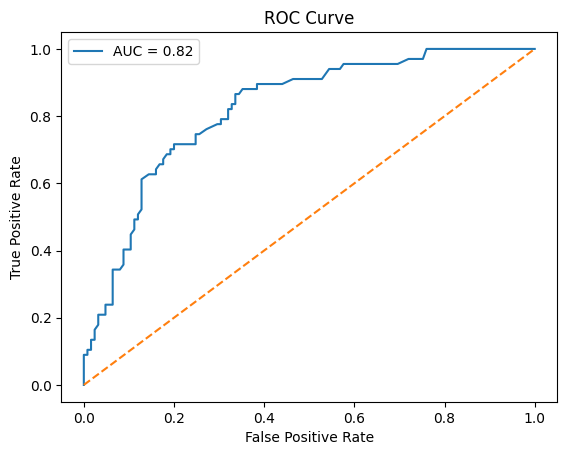

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


- Calculate True Positive Rate and False Positive Rate for each threshold(different probablity cutoffs which is from 1-->0).

**AUC** - measures how well the model separates classes overall.

🟠 Dashed diagonal

- Random classifier
- Reference baseline
- TPR increases at the same rate as FPR
- AUC - 0.5

🔵 Blue curve

- Rises quickly upward
- Stays well above the diagonal
- AUC = 0.82: If you randomly pick one positive and one negative sample,
the model will correctly rank the positive higher 82% of the time.

Indicates:
- High TPR even at low FPR
- Good class separation

**Adjust the Classification Threshold**
- Optimized the model for medical sensitivity by lowering the decision threshold.
- By default, predict uses 0.5 probability threshold. For imbalanced data, lowering threshold improves recall (more diabetic cases detected):

↑ Recall for diabetes

↓ Precision slightly

↑ F1-score

-- Much better for medical screening.

In [67]:
threshold = 0.3
y_pred_adjusted = (y_prob > threshold).astype(int)


In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# Apply tuned threshold
threshold = 0.3
y_pred_final = (y_prob > threshold).astype(int)

# Confusion Matrix (FINAL)
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest (Threshold = 0.3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Saving the Updated Model and Scaler**

In [69]:
import joblib
joblib.dump(best_model, 'Random_Forest_balanced_model.pkl')
joblib.dump(scaler, 'scaler_balanced.pkl')


['scaler_balanced.pkl']

**Inference on a Sample**

In [70]:
print("X_test shape:", X_test.shape)
print("\nFirst 10 rows of X_test:")
print(X_test.head(10))

print("\nCorresponding y_test (true labels):")
print(y_test.head(10))

X_test shape: (192, 5)

First 10 rows of X_test:
     Glucose  BloodPressure   BMI  Age  DiabetesPedigreeFunction
635    104.0           72.0  31.2   38                     0.465
698    127.0           88.0  34.5   28                     0.598
637     94.0           76.0  31.6   23                     0.649
402    136.0           84.0  35.0   35                     0.286
425    184.0           78.0  37.0   31                     0.264
653    120.0           54.0  26.8   27                     0.455
351    137.0           84.0  31.2   30                     0.252
537     57.0           60.0  21.7   67                     0.735
44     159.0           64.0  27.4   40                     0.294
203     99.0           70.0  20.4   27                     0.235

Corresponding y_test (true labels):
635    1
698    0
637    0
402    1
425    1
653    0
351    0
537    0
44     0
203    0
Name: Outcome, dtype: int64


In [71]:
# @title
# sample = X_test.iloc[1:2]

# # Identify the best performing model from the results table
# best_model_name = results_df.sort_values("F1-score", ascending=False).iloc[0]['Model']

# if best_model_name in ["Logistic Regression", "SVM", "Neural Network"]:
#     sample_input = scaler.transform(sample)
# else:
#     sample_input = sample

# raw_pred = best_model.predict(sample_input)
# raw_prob = best_model.predict_proba(sample_input)[0,1]

# print("Prediction (0/1):", raw_pred)
# print("Diabetes probability:", raw_prob)

In [72]:
# Pick one row from test set
sample = X_test.iloc[0:1]   # shape (1, 5)

# Since the final model is Random Forest, no scaling is required
sample_input = sample

# Make prediction
raw_pred = best_model.predict(sample_input)
raw_prob = best_model.predict_proba(sample_input)[0, 1]

print("Prediction (0/1):", raw_pred)
print("Diabetes probability:", raw_prob)


Prediction (0/1): [1]
Diabetes probability: 0.64


In [73]:
# from google.colab import files
# files.download("Random_Forest_balanced_model.pkl")
# files.download("scaler_balanced.pkl")